# Prediction using Supervised ML

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Some Configurations

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## Loading the data

In [3]:
# Loading the data

data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In [4]:
# Inspecting the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


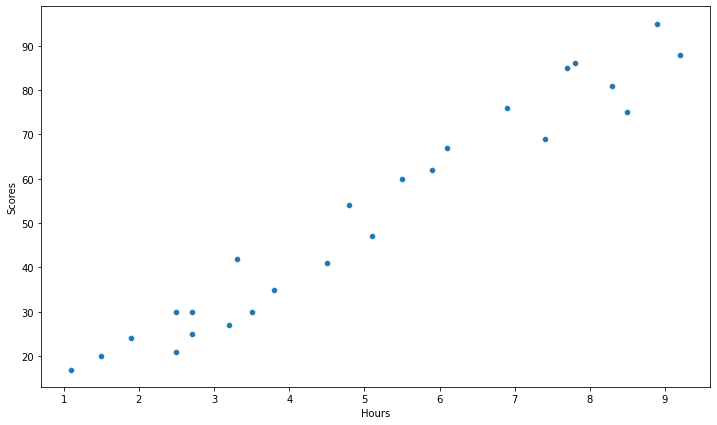

In [5]:
# Visualizing the data

sns.scatterplot(x='Hours', y='Scores', data=data)

**The Above graph shows that there is a positive linear relation between the Number of Hours Studided and Scores Gained**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f514c669a50>,
      dtype=object)

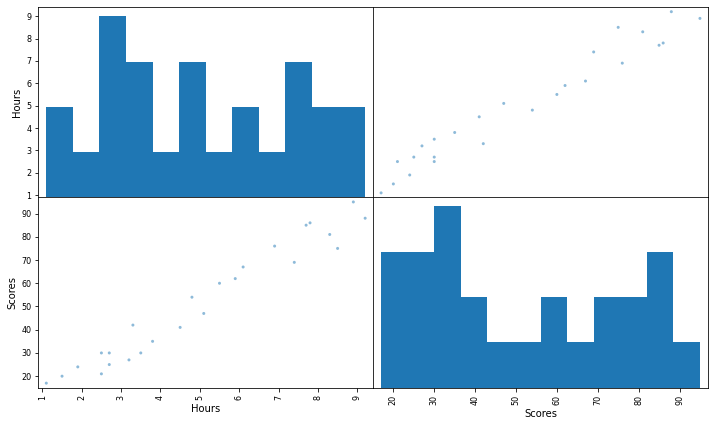

In [6]:
# Visualizing the pair plot

pd.plotting.scatter_matrix(data, hist_kwds={'bins': 12})

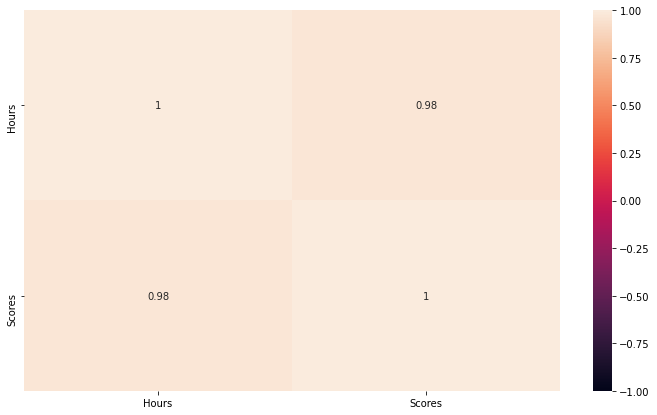

In [7]:
# Correlation matrix

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

## Data Preparation

In [8]:
# Separating out features and labels

X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values.reshape(-1, 1)

In [9]:
# Making a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=88)

## Fitting the model

In [10]:
# Defining the model

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

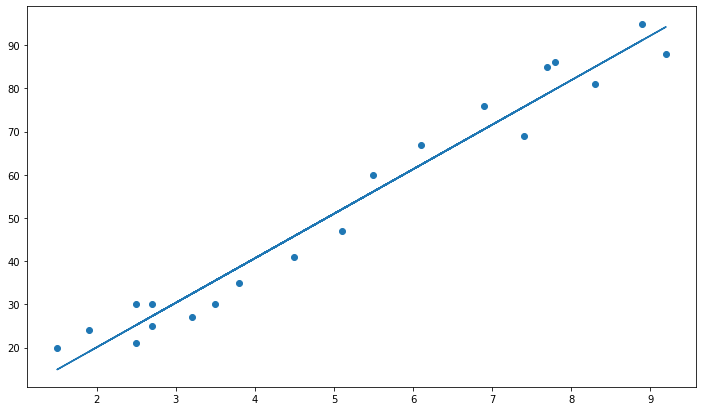

In [11]:
# Plotting points and lines

y_hat = reg.coef_ * X_train + reg.intercept_

plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat)

## Prediction using the model

In [12]:
# Predicting on train and test data

train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [13]:
# Comparing Actual & Predited values

vals = pd.DataFrame({'Actual': np.squeeze(y_test), 'Predicted': np.squeeze(test_pred)})
vals

,Actual,Predicted
0,54,48.914279
1,42,33.463116
2,17,10.801410
3,62,60.245132
4,75,87.027148


In [14]:
# Testing with our data

hours = np.array([9.25]).reshape(-1, 1)
score = np.squeeze(reg.predict(hours))

print(f"Score Gained is {score} for studying {np.squeeze(hours)} hours")

Score Gained is 94.75272937202871 for studying 9.25 hours


## Evaluating of the model

In [15]:
# Evaluating the model on train and test data

# MSE
print(f"Mean Squared Error on train data is: {mean_squared_error(y_train, train_pred)}")
print(f"Mean Squared Error on test data is:  {mean_squared_error(y_test, test_pred)}")
print()

# MAE
print(f"Mean Absolute Error on train data is: {mean_absolute_error(y_train, train_pred)}")
print(f"Mean Absolute Error on test data is:  {mean_absolute_error(y_test, test_pred)}")

Mean Squared Error on train data is: 24.14958109224188
Mean Squared Error on test data is:  56.97946192455612

Mean Absolute Error on train data is: 4.780449601637007
Mean Absolute Error on test data is:  6.720642147174479
